In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


# Python for Data Science

## Lecture 8: Machine learning 1.

### Machine learning methods

Categories:

    I. Supervised learning
        1) Classification
        2) Regression
    II. Unsupervised learning
        1) Clustering
        2) Density estimation        
\+ visualization

Now: I.1) and I.2)

### I.1) Classification

IMDB dataset

In [3]:
import pandas as pd
import numpy as np
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Taking a sample dataset:

In [4]:
df_positive = df_review[df_review['sentiment']=='positive'][:1000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]
df_review_sample = pd.concat([df_positive, df_negative])

Creating train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_sample, test_size=0.33, random_state=42)

Setting independent and dependent variables


In [6]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Converting text to numerical values

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
print(train_x_vector)

  (0, 7002)	0.043693134307057284
  (0, 8394)	0.022245963751589073
  (0, 14060)	0.03848077333617329
  (0, 15154)	0.04055066497162364
  (0, 4953)	0.04618745254314068
  (0, 9199)	0.04618745254314068
  (0, 5053)	0.016363073534808297
  (0, 13475)	0.043693134307057284
  (0, 15845)	0.04618745254314068
  (0, 6213)	0.039429069118248866
  (0, 14198)	0.04618745254314068
  (0, 12082)	0.043693134307057284
  (0, 6534)	0.041923387354332264
  (0, 10380)	0.03379228154673183
  (0, 5410)	0.043693134307057284
  (0, 17371)	0.03693475088216546
  (0, 1803)	0.03516500392944044
  (0, 8980)	0.04618745254314068
  (0, 5200)	0.03693475088216546
  (0, 13873)	0.03848077333617329
  (0, 465)	0.04618745254314068
  (0, 13837)	0.043693134307057284
  (0, 9367)	0.03421670814736488
  (0, 11133)	0.032338077897292795
  (0, 3405)	0.04618745254314068
  :	:
  (1339, 1039)	0.06580722499726892
  (1339, 9506)	0.06119937622479033
  (1339, 8166)	0.13037361818396498
  (1339, 4682)	0.09303852729449172
  (1339, 3613)	0.04943039981852226

Displaying the matrix


In [9]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,007,02,06,08,10,100,1000,100th,101,103,105,11,110,116,12,120,13,13848,13th,14,140,14th,15,150,15ft,16,16mm,16th,17,1700,177,1794,17th,18,1800,1800s,1840,1869,...,zen,zenia,zero,zeroes,zest,zeta,zhang,ziegler,zimbalist,zinc,zingers,zip,ziyi,zodiac,zoe,zoey,zola,zombi,zombie,zombies,zombiez,zomcom,zone,zoned,zones,zoo,zoology,zoom,zooming,zooms,zp,zu,zuber,zucker,zulu,zwick,zzzzzzzzzzzzzzzzzz,æon,élan,être
191,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1819,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
786,0.0,0.0,0.0,0.0,0.0,0.0,0.044532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.111610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
553,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
921,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183876,0.0,0.0,0.0


Transforming vector $x$

In [12]:
test_x_vector = tfidf.transform(test_x)
test_x_vector

<660x20202 sparse matrix of type '<class 'numpy.float64'>'
	with 52954 stored elements in Compressed Sparse Row format>

##I.1. Classification methods
###I.1.a) Support vector machine

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [14]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


###I.1.b) Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [21]:
print(dec_tree.predict(tfidf.transform(['A good movie'])))
print(dec_tree.predict(tfidf.transform(['An excellent movie'])))
print(dec_tree.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


###I.1.c) Naive Bayes


In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [28]:
print(gnb.predict(tfidf.transform(['A good movie']).toarray()))
print(gnb.predict(tfidf.transform(['An excellent movie']).toarray()))
print(gnb.predict(tfidf.transform(['I did not like this movie at all']).toarray()))

['negative']
['negative']
['negative']


###I.1.d) Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [31]:
print(log_reg.predict(tfidf.transform(['A good movie'])))
print(log_reg.predict(tfidf.transform(['An excellent movie'])))
print(log_reg.predict(tfidf.transform(['I did not like this movie at all'])))

['negative']
['positive']
['negative']


##Model evaluation
###a) Mean accuracy

In [32]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8378787878787879
0.7015151515151515
0.6287878787878788
0.8121212121212121


###b) F1 score

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found.

Precision is how many of the returned hits were true positive, i.e. how many of the found were correct hits.

In [33]:
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)


array([0.8410104 , 0.83462133])

###c) Classification score

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.81      0.87      0.84       325
    negative       0.87      0.81      0.83       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



###d) Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])
conf_mat

array([[283,  42],
       [ 65, 270]])

###Model tuning

In [36]:
from sklearn.model_selection import GridSearchCV #set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [37]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


##I.2) Regression

In [38]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [39]:
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting

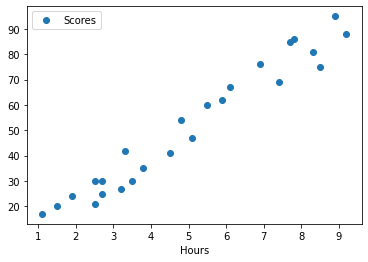

In [41]:
dataset.plot(x='Hours', y='Scores', style='o')

Dependent and independent variables

In [42]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values



Training and test sets

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###I.2.a) Linear regression (ordinary least squares (OLS))

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


Making predictions

In [45]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Evaluating the model

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


###I.2.b) Multiple linear regression

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Dependent and independent variables

In [50]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

Training and test sets

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the model

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Coefficients

In [53]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


Making predictions

In [54]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Evaluating the algorithm

In [55]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


###I.2.c) LASSO regression

In [56]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn import linear_model
from sklearn.model_selection import cross_val_score #cross-validation
from sklearn.model_selection import RepeatedKFold 
las_mod = linear_model.Lasso(alpha=0.1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Model evaluating

In [57]:
scores = cross_val_score(las_mod, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

Forcing scores to be positive

In [58]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 53.914 (20.204)


Predictions

In [59]:
las_mod.fit(X,y)
y_pred = las_mod.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,473.579169
4,410,533.753423
26,577,588.733028
30,571,568.921717
32,577,650.105626
37,704,641.535804
34,487,509.277638
40,587,661.566695
7,467,493.070963
10,580,501.819060


###I.2.d) Bayesian regression

In [60]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

BayesianRidge()

In [61]:
y_pred=reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,585.062425
4,410,587.408527
26,577,584.651325
30,571,583.586557
32,577,584.107828
37,704,583.800092
34,487,585.843638
40,587,584.665298
7,467,585.958829
10,580,583.852828


In [62]:
reg.coef_

array([-1.42541297e-06, -4.76696938e-04, -6.46244178e-04,  1.27622938e-07])

##Source

https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

https://scikit-learn.org/stable/modules/linear_model.html

https://stackabuse.com/linear-regression-in-python-with-scikit-learn

https://machinelearningmastery.com/lasso-regression-with-python/